In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train_full.shape   # image size will be 28x28 and 60000 is number of images

(60000, 28, 28)

In [7]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

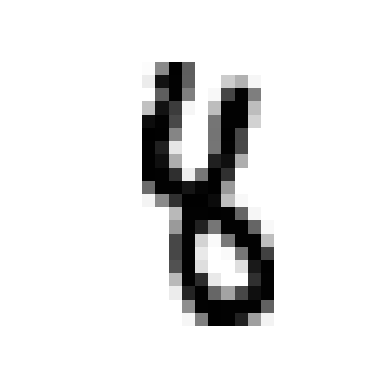

In [8]:
plt.imshow(X_train_full[7000],cmap='binary')
plt.axis("off")
plt.show()

<Axes: >

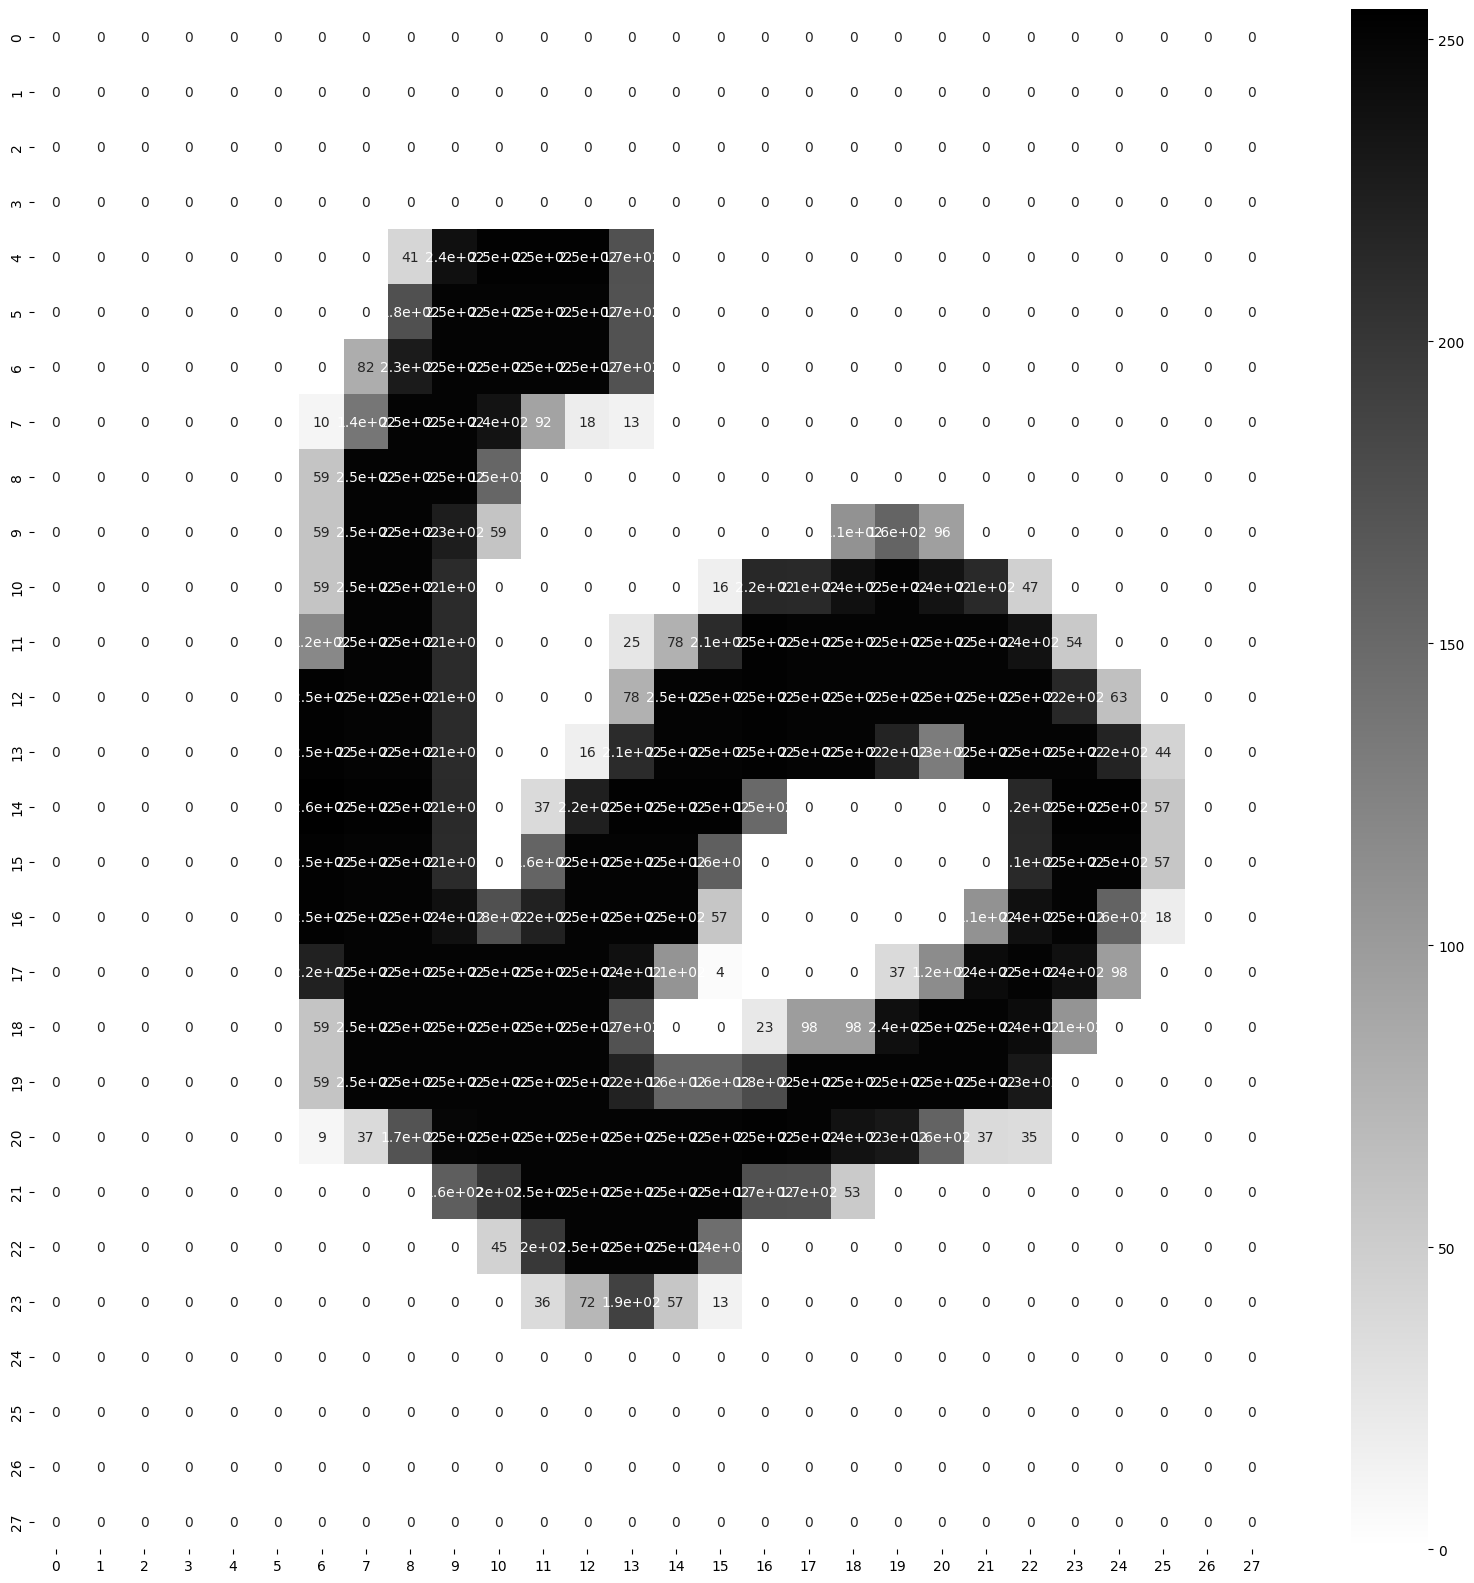

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[9000],annot=True,cmap="binary")

In [10]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
# Scale the test set as well
X_test = X_test / 255.

In [12]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

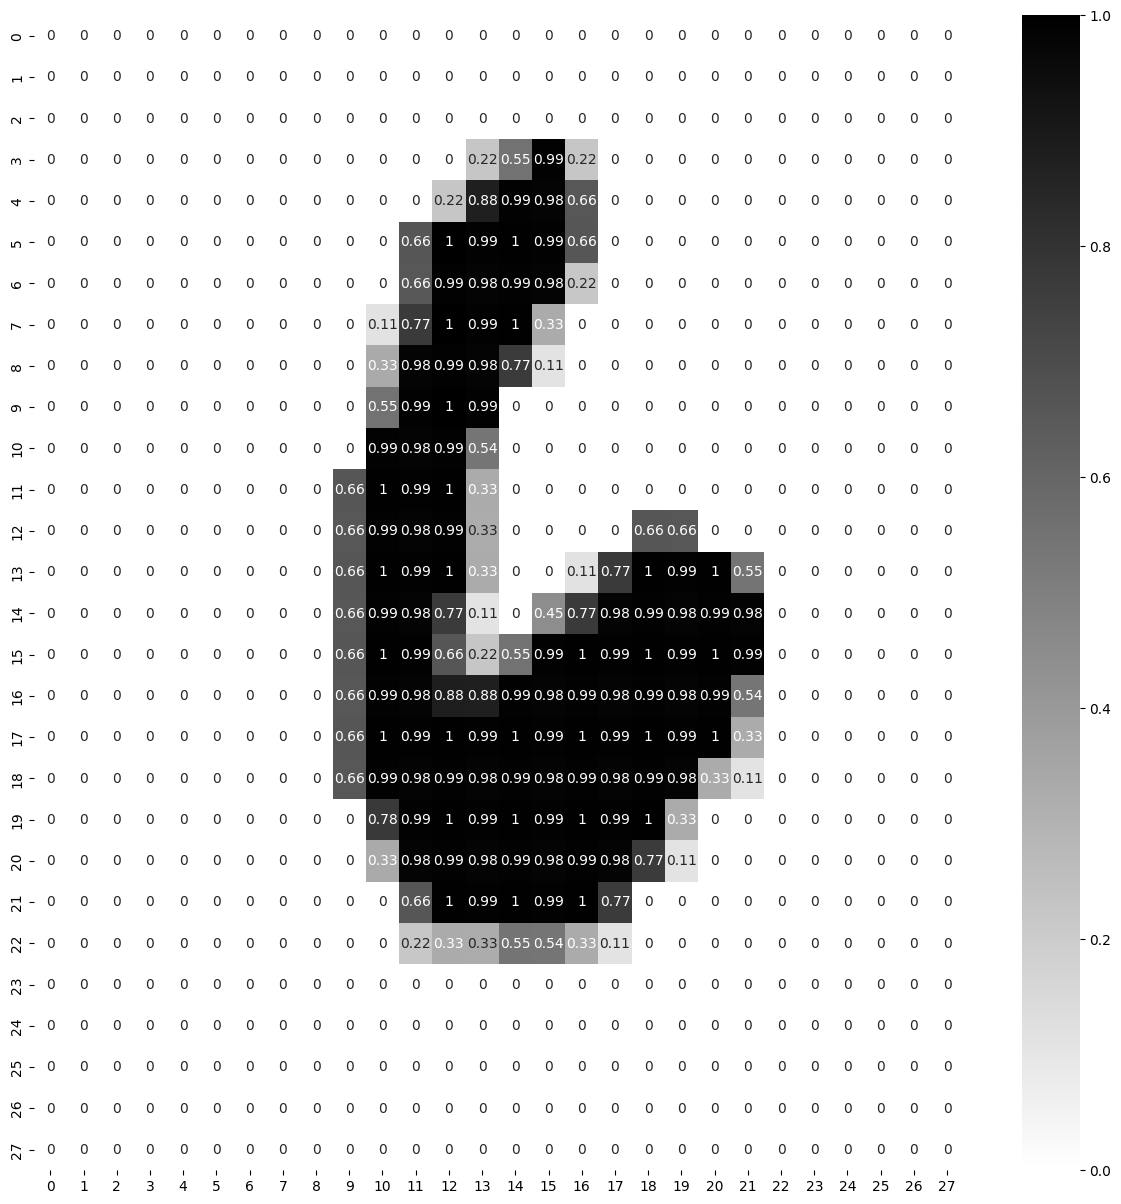

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[6000],annot=True,cmap="binary")

In [17]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [18]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=["accuracy"]

In [21]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [22]:
model_clf.layers[1].name

'hiddenlayer1'

In [23]:
hidden1 = model_clf.layers[1]

In [24]:
# you can get the weights of the layer
weights,biases = hidden1.get_weights()

In [25]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 3ms/step - loss: 0.2069 - accuracy: 0.9394 - val_loss: 0.0977 - val_accuracy: 0.9716
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0858 - accuracy: 0.9734 - val_loss: 0.0769 - val_accuracy: 0.9754
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.0753 - val_accuracy: 0.9756
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0931 - val_accuracy: 0.9740
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9884 - val_loss: 0.0731 - val_accuracy: 0.9804


In [26]:
import time
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [27]:
model_clf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_12_25_06_46_11_.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [30]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.206862,0.939364,0.097737,0.9716
1,0.085801,0.973436,0.076907,0.9754
2,0.059389,0.981836,0.075313,0.9756
3,0.043996,0.986109,0.093115,0.9740
4,0.035476,0.988382,0.073053,0.9804


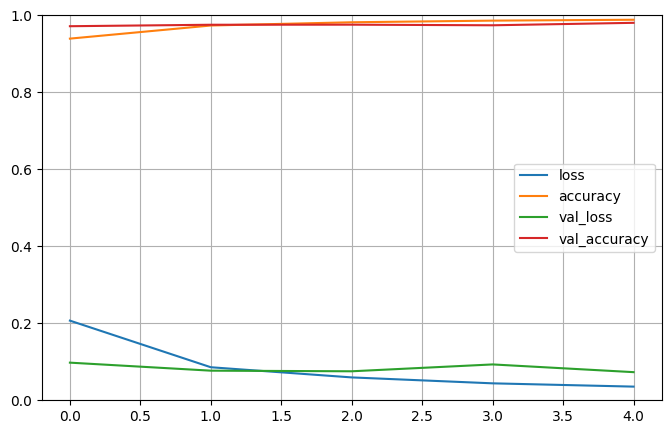

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9770


[0.07761357724666595, 0.9769999980926514]

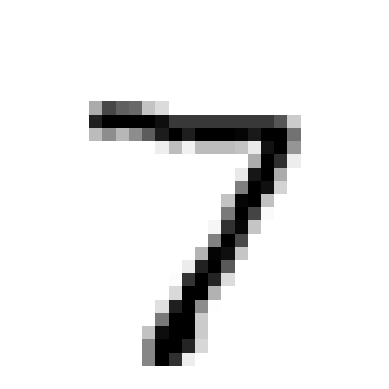

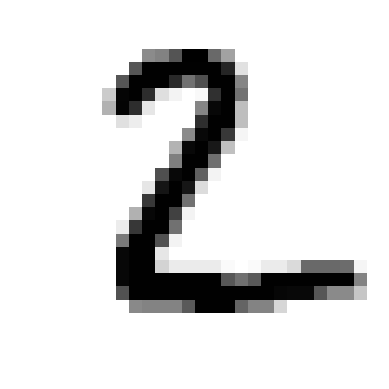

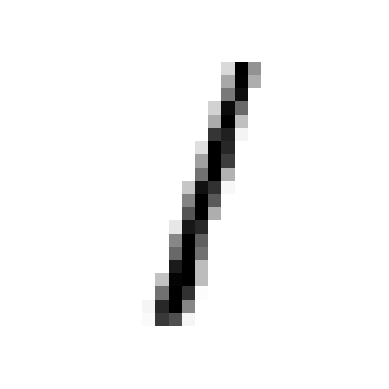

In [33]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()

In [34]:
prediction = model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 75ms/step


In [35]:
prediction

array([[1.3319638e-09, 3.0218181e-09, 1.8875353e-07, 1.0332553e-06,
        3.0180206e-10, 6.8427521e-09, 2.1014176e-12, 9.9999201e-01,
        8.8548742e-09, 6.7782348e-06],
       [2.3318773e-08, 2.5089003e-06, 9.9999619e-01, 1.3220571e-06,
        2.8366495e-11, 4.5216115e-09, 2.2146001e-09, 3.5040665e-10,
        3.4335368e-08, 8.9817251e-12],
       [4.4207945e-06, 9.9380326e-01, 2.5186356e-04, 8.0364935e-06,
        4.3247669e-04, 6.0734266e-07, 1.1400025e-05, 3.7972266e-03,
        1.6853707e-03, 5.3135000e-06]], dtype=float32)

In [36]:
y_prob=prediction[0]  # get probabilites for all classes

In [37]:
y_prob.round(5)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 9.9999e-01, 0.0000e+00, 1.0000e-05],
      dtype=float32)

In [38]:
np.argmax(y_prob.round(5))

7

In [39]:
y_prob=prediction[1]

In [40]:
np.argmax(y_prob)

2

In [41]:
model_clf.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.3319611e-09, 3.0218124e-09, 1.8875336e-07, ..., 9.9999201e-01,
        8.8548742e-09, 6.7782285e-06],
       [2.3318728e-08, 2.5088978e-06, 9.9999619e-01, ..., 3.5040665e-10,
        3.4335301e-08, 8.9816904e-12],
       [4.4207945e-06, 9.9380326e-01, 2.5186382e-04, ..., 3.7972284e-03,
        1.6853707e-03, 5.3135000e-06],
       ...,
       [4.5824837e-12, 4.6878673e-10, 1.5978064e-11, ..., 1.3906121e-08,
        3.0753316e-08, 1.1325327e-07],
       [4.9707933e-07, 6.3990646e-10, 6.2868233e-13, ..., 1.2184026e-10,
        3.0419949e-05, 3.7359869e-11],
       [1.9492845e-09, 1.0234346e-12, 8.7638959e-12, ..., 1.5571314e-13,
        1.3309514e-08, 1.9241059e-10]], dtype=float32)

In [43]:
# load the saved model
from keras.models import load_model
model = load_model("/content/SAVED_MODELS/Model_2023_12_25_06_46_11_.h5")

In [44]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 52ms/step


array([[1.3319638e-09, 3.0218181e-09, 1.8875353e-07, 1.0332553e-06,
        3.0180206e-10, 6.8427521e-09, 2.1014176e-12, 9.9999201e-01,
        8.8548742e-09, 6.7782348e-06],
       [2.3318773e-08, 2.5089003e-06, 9.9999619e-01, 1.3220571e-06,
        2.8366495e-11, 4.5216115e-09, 2.2146001e-09, 3.5040665e-10,
        3.4335368e-08, 8.9817251e-12],
       [4.4207945e-06, 9.9380326e-01, 2.5186356e-04, 8.0364935e-06,
        4.3247669e-04, 6.0734266e-07, 1.1400025e-05, 3.7972266e-03,
        1.6853707e-03, 5.3135000e-06]], dtype=float32)